In [1]:
import matplotlib.pyplot as plt


cost = float(input("shareprice: "))
amount = int(input("amount of shares: "))
div_yield = float(input("div yield %: "))/100
periods = int(input("div pay periods: "))
montly_contribution = float(input("monthly contrib: "))
yearly_growth = float(input("yearly growth %: "))/100
start_year = int(input("start year: "))
years = int(input("years: "))

def pad(s, n):
  s = str(s)
  if "." in s:
    parts = s.split(".")
    s = parts[0] + "." + "".join(parts[1][:2])
  x = len(s)
  if x < n:
    for i in range(n-x):
      s = "0" + s
  return s

history = {
    "years" : [],
    "worth" : [],
    "dividends" : [],
    "capital" : []
}

capital = 0
worth = amount * cost

div_month_delimiter = 12 / periods

def reinvest():
    global capital, amount, cost, worth
    while capital >= cost:
        amount += 1
        capital -= cost
    worth = cost * amount


for year in range(years):
    period_div_yield = div_yield / periods
    yearly_dividends = 0
    for month in range(1, 13):
        if month % div_month_delimiter == 0:
            dividend = worth * period_div_yield
            yearly_dividends += dividend
            capital += dividend

        capital += montly_contribution
        reinvest()
    cost += cost * yearly_growth
    worth += cost * yearly_growth

    history["years"].append(start_year + year)
    history["worth"].append(worth)
    history["dividends"].append(yearly_dividends)
    history["capital"].append(capital)
    
print("year |  div  |   worth  |  capital  ")
print("------------------------------------")
for i in range(years):
    year = history["years"][i]
    div = round(history["dividends"][i], 2)
    worth = round(history["worth"][i], 2)
    capital = round(history["capital"][i], 2)
    
    print("%s | %s | %s | %s " % (pad(year, 2), pad(div, 8), pad(worth, 8), pad(capital, 8)))

print("------------------------------------")
total_saved = montly_contribution * 12 * years
total_dividend = round(sum(history["dividends"]), 2)
total_yield = round(total_dividend / float(total_saved+ 0.00001) * 100, 2)
total_worth = round(history["worth"][years-1] + history["capital"][years-1],2)
print("contribution: %s" % str(total_saved))
print("div yield: %s (%s%%)" % (str(total_dividend), str(total_yield)))
print("total worth: %s" % str(total_worth))

shareprice:  45
amount of shares:  10
div yield %:  7
div pay periods:  4
monthly contrib:  50
yearly growth %:  2
start year:  2024
years:  10


year |  div  |  worth | capital
------------------------------------
2024 | 0054.34 | 1080.92 | 00024.34 
2025 | 0102.82 | 1791.04 | 00038.65 
2026 | 0154.03 | 2575.95 | 000043.6 
2027 | 0213.94 | 3439.29 | 00045.71 
2028 | 0276.18 | 4384.84 | 00045.12 
2029 | 0346.05 | 5416.53 | 00047.18 
2030 | 0420.37 | 6589.08 | 00003.33 
2031 | 0503.86 | 7806.37 | 00021.68 
2032 | 0595.13 | 9175.17 | 00004.14 
2033 | 0692.68 | 10649.37 | 00006.11 
------------------------------------
contribution: 6000.0
div yield: 3359.38 (55.99%)
total worth: 10655.49


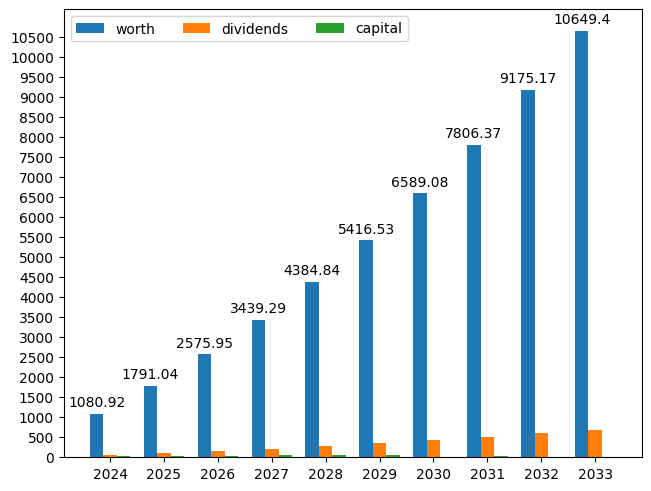

In [75]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(history["years"]))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in history.items():
    if attribute == "years":
        continue
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    if attribute == "worth" :
        ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_xticks(x + width, history["years"])
ax.set_yticks(np.arange(0, max(history["worth"]), step=500))
ax.legend(loc='upper left', ncols=3)

plt.show()